# MCNPy Tutorial: MCTAL File

This tutorial explores the functionality of MCNPy for working with MCNP MCTAL output files. We'll cover how to:

- Parse and examine MCNP MCTAL files
- Work with tallies and access tally data
- Convert tally data to pandas DataFrames for analysis
- Work with multidimensional data and xarray integration
- Extract specific slices of multidimensional data
- Access energy-integrated results
- Visualize tally results and convergence information
- Analyze perturbation data

Let's start by importing the necessary modules and loading example MCTAL files.

In [77]:
import mcnpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Setup paths
repo_root = Path.cwd().resolve().parent
data_dir = repo_root / 'examples' / 'data'

# Load example MCTAL files
mctal_file3 = data_dir / 'mctalfile_example_3.m'  # For general features
mctal_file1 = data_dir / 'mctalfile_example_1.m'  # For TFC and perturbations

## 1. Basic MCTAL File Parsing

Let's start by parsing an MCNP MCTAL file and exploring the basic structure.

In [ ]:
# Parse the first MCTAL file
mctal_data3 = mcnpy.read_mctal(mctal_file3)

# Display basic information about the MCTAL file
mctal_data3

                          MCTAL File Summary                          

               Code: mcnp6 6
         Problem ID: 03/21/25 09:04:37
                NPS: 1.10e+05
              Title: Example 3 MODEL

Tally Information:
      Total Tallies: 33

Tally Type Distribution:
----------------------------------------------------------------------
   Type   |         Description          |         Tally IDs          
----------------------------------------------------------------------
    F4    |          Cell flux           |10014, 10024, 10034, 10044  
          |                              |10054, 10064, 10074, 10084  
          |                              |10094, 10104, 10114, 10124  
          |                              |10134, 10144, 10154, 10164  
          |                              |10174, 10184, 10194, 10204  
          |                              |10214, 10224, 10234, 10244  
          |                              |10254, 10264, 10274, 10284  
          |  

### MCTAL File Structure

The parsed MCTAL file is represented by a `Mctal` object containing:

- Header information (code name, version, problem id, etc.)
- Number of tallies and perturbations
- Tally data organized by tally ID
- Detailed information about tally types

In [79]:
# If you need specific header information, you can still access individual attributes:
print(f"Code: {mctal_data3.code_name} {mctal_data3.ver}")
print(f"Problem ID: {mctal_data3.probid}")
print(f"Number of particle histories: {mctal_data3.nps:.2e}")
print(f"Problem Title: {mctal_data3.problem_id}")

# Display tally information
print(f"\nNumber of tallies: {mctal_data3.ntal}")
print(f"Tally numbers: {mctal_data3.tally_numbers}")

Code: mcnp6 6
Problem ID: 03/21/25 09:04:37
Number of particle histories: 1.10e+05
Problem Title: Example 3 MODEL

Number of tallies: 33
Tally numbers: [10014, 10024, 10034, 10044, 10054, 10064, 10074, 10084, 10094, 10104, 10114, 10124, 10134, 10144, 10154, 10164, 10174, 10184, 10194, 10204, 10214, 10224, 10234, 10244, 10254, 10264, 10274, 10284, 10294, 10304, 20014, 20024, 20234]


## 2. Working with Tallies

Tallies are the main output of MCNP simulations. The `Mctal` class provides access to all tallies in the MCTAL file, each represented by a `Tally` object.

In [80]:
# Get a list of all tally IDs
tally_ids = list(mctal_data3.tally.keys())
print(f"Available tally IDs: {tally_ids}")

# Access a specific tally
if tally_ids:  # Check if we have any tallies
    tally_id = tally_ids[0]  # Take the first tally ID as an example
    tally = mctal_data3.tally[tally_id]
    
    # Display the tally information
    display(tally)
else:
    print("No tallies found in this MCTAL file.")

Available tally IDs: [10014, 10024, 10034, 10044, 10054, 10064, 10074, 10084, 10094, 10104, 10114, 10124, 10134, 10144, 10154, 10164, 10174, 10184, 10194, 10204, 10214, 10224, 10234, 10244, 10254, 10264, 10274, 10284, 10294, 10304, 20014, 20024, 20234]


                                  MCNP Tally 10014                                   
                     Reaction rate 58Ni(n,p)  (Vol.) in (-1,+2)                      

Dimensions:
-------------------------------------------------------------------------------------
Dimension            Size           
-------------------------------------------------------------------------------------
Cell/Surface         1              
Segment              7              
Multiplier           1              
Energy               4              
-------------------------------------------------------------------------------------
Total Results: 28


Additional Information:
• Integral energy data available
• 1 TFC data points


Available Methods:
-------------------------------------------------------------------------------------
Method                            Description                                      
------------------------------------------------------------------------------------

### Accessing Tally Data

Each tally contains results, errors, and energy bin information. Let's explore how to access this data.

In [ ]:
# Get the first tally
tally = mctal_data3.tally[tally_ids[0]]

# Display tally name and basic dimension information
print(f"Tally name: {tally.name}")
print(f"Tally dimensions: {tally.get_dimensions()}")

# Display energy bin structure if available
if tally.energies:
    print("\nEnergy bin boundaries:")
    for i, energy in enumerate(tally.energies):
        print(f"  Bin {i}: {energy:.6e} MeV")

Tally name: Reaction rate 58Ni(n,p)  (Vol.) in (-1,+2)
Tally dimensions: {'cell': 1, 'segment': 7, 'multiplier': 1, 'energy': 4}

Energy bin boundaries:
  Bin 0: 1.000000e-01 MeV
  Bin 1: 1.000000e+00 MeV
  Bin 2: 3.000000e+00 MeV
  Bin 3: 2.000000e+01 MeV


## 3. Converting Tally Data to DataFrames

MCNPy provides methods to convert tally data to pandas DataFrames for easier analysis and visualization.

In [ ]:
# Get the first tally
tally = mctal_data3.tally[tally_ids[0]]

# Convert tally data to DataFrame
tally_df = tally.to_dataframe()

# Display the DataFrame
print("Tally data as DataFrame:")
display(tally_df)

# For energy-integrated data (if available)
integral_df = tally.get_integral_energy_dataframe()
if not integral_df.empty:
    print("\nEnergy-integrated data as DataFrame:")
    display(integral_df)

Tally data as DataFrame:


,Cell,Segment,Multiplier,Energy,Result,Error
0,22002,0,0,0.1,0.0,0.0000
1,22002,0,0,1.0,150578.0,0.7105
2,22002,0,0,3.0,8901150.0,0.5135
3,22002,0,0,20.0,51558600.0,0.7182
4,22002,1,0,0.1,0.0,0.0000
5,22002,1,0,1.0,111063.0,0.7287
6,22002,1,0,3.0,66178300.0,0.6156
7,22002,1,0,20.0,0.0,0.0000
8,22002,2,0,0.1,0.0,0.0000
9,22002,2,0,1.0,214811.0,0.3045



Energy-integrated data as DataFrame:


,Cell,Segment,Multiplier,Result,Error,Energy
0,22002,0,0,60610300.0,0.6156,Integral
1,22002,1,0,66289300.0,0.6146,Integral
2,22002,2,0,131235000.0,0.2830,Integral
3,22002,3,0,83685700.0,0.4887,Integral
4,22002,4,0,248358000.0,0.2721,Integral
5,22002,5,0,93375700.0,0.6997,Integral
6,22002,6,0,99200200.0,0.4681,Integral


## 4. Working with Multidimensional Data

MCNPy now supports multidimensional data analysis using xarray, which provides labeled N-dimensional arrays.
This is particularly useful for complex tallies with multiple dimensions.

In [82]:
# Get the first tally
tally = mctal_data3.tally[tally_ids[0]]

# Convert tally data to xarray Dataset
ds = tally.to_xarray()
print("Tally data as xarray Dataset:")
display(ds)

Tally data as xarray Dataset:


<xarray.Dataset> Size: 552B
Dimensions:     (cell: 1, segment: 7, multiplier: 1, energy: 4)
Coordinates:
  * cell        (cell) int64 8B 22002
  * segment     (segment) int64 56B 0 1 2 3 4 5 6
  * multiplier  (multiplier) int64 8B 0
  * energy      (energy) float64 32B 0.1 1.0 3.0 20.0
Data variables:
    result      (cell, segment, multiplier, energy) float64 224B 0.0 ... 5.65...
    error       (cell, segment, multiplier, energy) float64 224B 0.0 ... 0.7575

### Extracting Slices of Multidimensional Data

For tallies with multiple dimensions, you can extract specific slices of data using the `get_slice()` method.

In [88]:
# Get the first tally
tally = mctal_data3.tally[tally_ids[0]]
dims = tally.get_dimensions()

print(f"Extracting slice from tally {tally_id} with dimensions: {dims}")

# Get a slice for a specific energy value:
results, errors = tally.get_slice(energy=tally.energies[2])
print(f"\nResults for first energy bin: {results}")
print(f"Errors for first energy bin: {errors}")


# Get a slice for a specific segment:
results, errors = tally.get_slice(segment=1)    # Segment numbering starts at 0
print(f"\nResults for second segment: {results}")
print(f"Errors for second segment: {errors}")
    

Extracting slice from tally 10014 with dimensions: {'cell': 1, 'segment': 7, 'multiplier': 1, 'energy': 4}

Results for first energy bin: [[[ 8901150.]
  [66178300.]
  [26666300.]
  [43900100.]
  [70412600.]
  [33045500.]
  [42515400.]]]
Errors for first energy bin: [[[0.5135]
  [0.6156]
  [0.3549]
  [0.6623]
  [0.3141]
  [0.7646]
  [0.4196]]]

Results for second segment: [[[       0.   111063. 66178300.        0.]]]
Errors for second segment: [[[0.     0.7287 0.6156 0.    ]]]


### Working with Energy-Integrated Data

For tallies with energy bins, MCNPy provides methods to access the energy-integrated data.

In [90]:
# Get first tally
tally = mctal_data3.tally[tally_ids[0]]

# Get the energy-integrated data
integral_data = tally.get_integral_energy_data()

# Display the energy-integrated data
print("Energy-integrated data available:")
print(f"Result: {integral_data['Result']}")
print(f"Error: {integral_data['Error']}")

# Convert to DataFrame for tabular view
integral_df = tally.get_integral_energy_dataframe()
display(integral_df)

Energy-integrated data available:
Result: [[[6.06103e+07]
  [6.62893e+07]
  [1.31235e+08]
  [8.36857e+07]
  [2.48358e+08]
  [9.33757e+07]
  [9.92002e+07]]]
Error: [[[0.6156]
  [0.6146]
  [0.283 ]
  [0.4887]
  [0.2721]
  [0.6997]
  [0.4681]]]


,Cell,Segment,Multiplier,Result,Error,Energy
0,22002,0,0,60610300.0,0.6156,Integral
1,22002,1,0,66289300.0,0.6146,Integral
2,22002,2,0,131235000.0,0.2830,Integral
3,22002,3,0,83685700.0,0.4887,Integral
4,22002,4,0,248358000.0,0.2721,Integral
5,22002,5,0,93375700.0,0.6997,Integral
6,22002,6,0,99200200.0,0.4681,Integral


## 5. Visualizing Tally Convergence with TFC Data

MCNPy provides visualization tools for Tally Fluctuation Chart (TFC) data, which shows how simulation results converge with increasing particle histories. For this section, we'll use `mctalfile_example_1.m` which contains TFC data.

MCTAL file with TFC data:


                          MCTAL File Summary                          

               Code: mcnp6 6
         Problem ID: 05/24/24 17:18:48
                NPS: 1.00e+07
              Title: attenuation Sphere for PWR

Tally Information:
      Total Tallies: 1

Tally Type Distribution:
----------------------------------------------------------------------
   Type   |         Description          |         Tally IDs          
----------------------------------------------------------------------
    F4    |          Cell flux           |4                           
----------------------------------------------------------------------


Perturbation Data Summary:
----------------------------------------------------------------------
   Tally ID    |      Perturbations      |      Perturbation IDs      
----------------------------------------------------------------------
       4       |          1760           |1-1760                      
---------------------------------------------


Tally 10014 has 20 TFC data points

Sample of TFC data:
NPS          Result          Error      FOM       
512000       1.155110e-08    0.025720   23.13     
1024000      1.129350e-08    0.018320   22.83     
1536000      1.111460e-08    0.014942   22.88     
2048000      1.121930e-08    0.012906   23.00     
2560000      1.116230e-08    0.011506   23.16     

Plotting TFC convergence data:


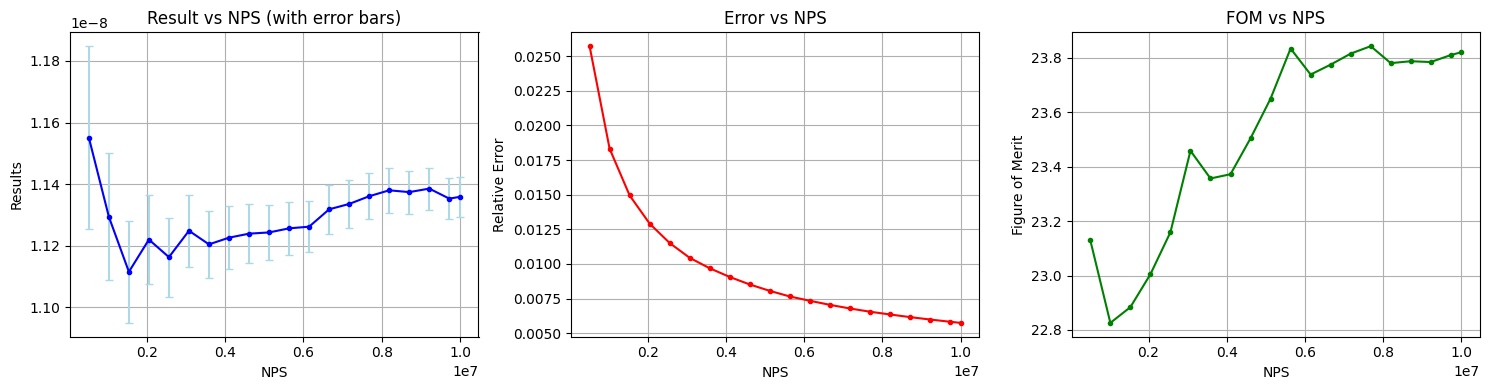


Plotting TFC convergence data without error bars:


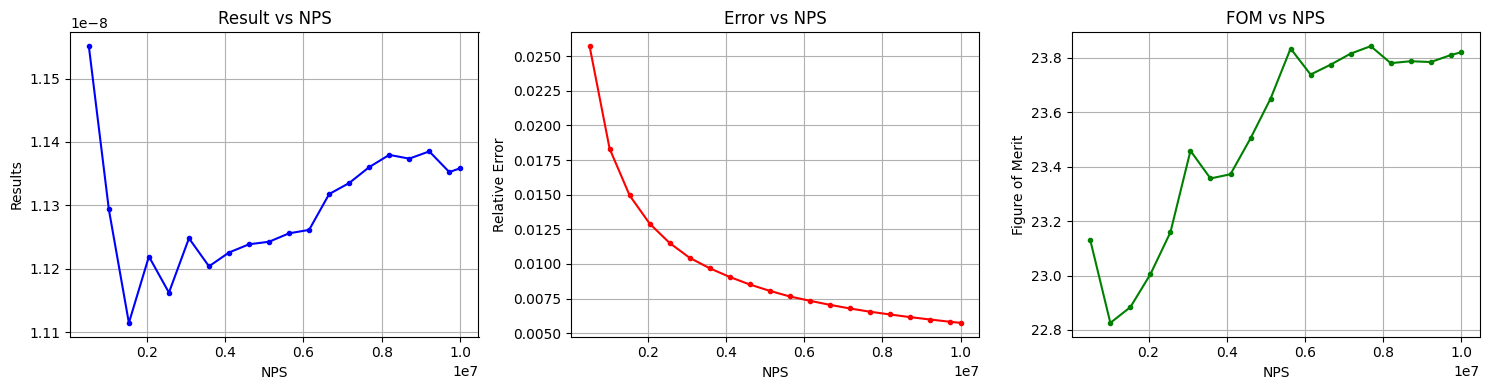

In [93]:
# Load the MCTAL file with TFC data
mctal_data1 = mcnpy.read_mctal(mctal_file1)
print("MCTAL file with TFC data:")
display(mctal_data1)

# Get all tally IDs from the second file
tally_ids = list(mctal_data1.tally.keys())

# Take the first tally with TFC data
tally = mctal_data1.tally[tally_ids[0]]

print(f"\nTally {tally_id} has {len(tally.tfc_nps)} TFC data points")

# Show some TFC data values
print("\nSample of TFC data:")
print(f"{'NPS':<12} {'Result':<15} {'Error':<10} {'FOM':<10}")
for i in range(min(5, len(tally.tfc_nps))):  # Show up to first 5 points
    print(f"{tally.tfc_nps[i]:<12} {tally.tfc_results[i]:<15.6e} {tally.tfc_errors[i]:<10.6f} {tally.tfc_fom[i]:<10.2f}")

# Plot the TFC data
print("\nPlotting TFC convergence data:")
tally.plot_tfc_data(figsize=(15, 4))

# Plot without error bars for clearer visualization of the trend
print("\nPlotting TFC convergence data without error bars:")
tally.plot_tfc_data(figsize=(15, 4), show_error_bars=False)

## 6. Working with Perturbations

MCNP perturbation data allows users to estimate the sensitivity of a tally to changes in cross-sections or material densities. MCNPy provides tools to analyze this data efficiently. We'll continue using `mctalfile_example_1.m` which contains perturbation data.

In [95]:
# Get the first tally with perturbation data
tally = mctal_data1.tally[tally_ids[0]]

# Display the perturbation collection summary
print(f"Perturbation collection for Tally {tally_id}:")
display(tally.perturbation)


Perturbation collection for Tally 10014:


                  Perturbation Collection                   

Total: 1760 perturbations
Perturbation numbers: 1-1760

Access:
- perturbation[num] for individual perturbations
- .to_dataframe() to convert all to DataFrame

In [97]:
# Get list of perturbation IDs
pert_ids = list(tally.perturbation.keys())

if pert_ids:  # Check if we have any perturbations
    # Access a specific perturbation
    pert_id = pert_ids[0]  # Take the first perturbation ID as an example
    pert = tally.perturbation[pert_id]
    
    # Display the perturbation
    display(pert)

                    MCNP Tally 4 - Perturbation 1                     

Dimensions:
----------------------------------------------------------------------
Dimension            Size           
----------------------------------------------------------------------
None                 0              
----------------------------------------------------------------------
Total Results: 3


Additional Information:
• Integral Result: 0.000000e+00
• Integral Error: 0.000000e+00
• 20 TFC data points


Available Methods:
----------------------------------------------------------------------
Method                    Description                               
----------------------------------------------------------------------
.to_dataframe()           Get results as pandas DataFrame           
.plot_tfc_data()          Visualize convergence with plots          
----------------------------------------------------------------------

### Converting Perturbation Data to DataFrames

For easier analysis, perturbation data can be converted to pandas DataFrames:

In [111]:
tally = mctal_data1.tally[tally_ids[0]]

# Convert all perturbations to a DataFrame
pert_df = tally.perturbation.to_dataframe()


print("All perturbations as DataFrame:")
display(pert_df)

# Analyze a single perturbation
single_pert = tally.perturbation[420]
single_df = single_pert.to_dataframe()

print(f"\nPerturbation 420 as DataFrame:")
display(single_df)

All perturbations as DataFrame:


,Energy,Result,Error,Perturbation
0,0.1,0.000000e+00,0.0000,1
1,1.0,0.000000e+00,0.0000,1
2,3.0,0.000000e+00,0.0000,1
3,0.1,0.000000e+00,0.0000,2
4,1.0,0.000000e+00,0.0000,2
...,...,...,...,...
5275,1.0,7.648100e-09,0.0071,1759
5276,3.0,1.066520e-09,0.0173,1759
5277,0.1,0.000000e+00,0.0000,1760
5278,1.0,0.000000e+00,0.0000,1760



Perturbation 420 as DataFrame:


,Energy,Result,Error
0,0.1,-1.811390e-10,0.1711
1,1.0,-7.793140e-10,0.0841
2,3.0,-3.828780e-11,0.7584


## 7. Summary

In this tutorial, we've explored the enhanced MCNPy functionality for working with MCNP MCTAL output files:

1. **Basic MCTAL Parsing**: Reading and examining MCTAL file structure
2. **Working with Tallies**: Accessing tally data and dimensions
3. **Data Conversion**: Converting tally data to pandas DataFrames
4. **Multidimensional Analysis**: Using xarray for labeled multidimensional data
   - Extracting specific slices with `get_slice()`
   - Working with energy-integrated data
5. **TFC Visualization**: Plotting and analyzing convergence trends
6. **Perturbation Analysis**: Working with perturbation data to study sensitivities

These enhanced tools make it easier to analyze complex MCNP simulation results, extract specific data slices of interest, and visualize both results and convergence behavior.